In [53]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [54]:
df_customer_address = pd.read_csv('data/df_customer_address.csv')
df_customer_demographics = pd.read_csv('data/df_customer_demographics.csv')
df_new_customers = pd.read_csv('data/df_new_customers.csv')
df_transactions = pd.read_csv('data/df_transactions.csv')


Text(0.5, 1.0, 'New customers')

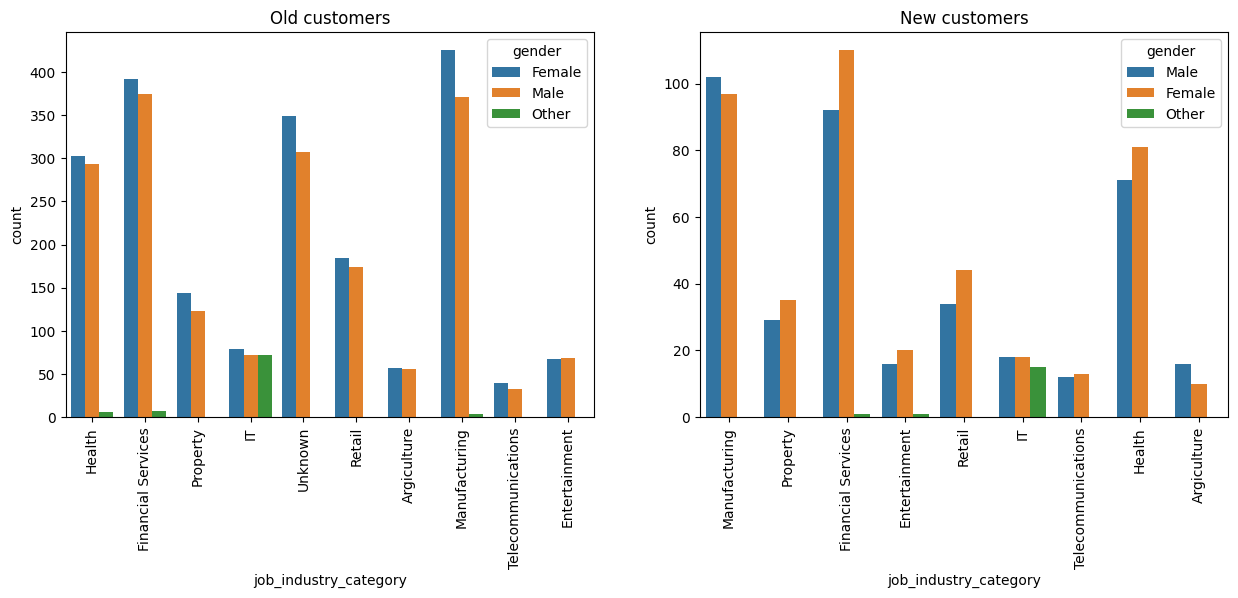

In [55]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
chart1 = sns.countplot(x='job_industry_category', hue='gender', data=df_customer_demographics)
chart1.set_xticklabels(chart1.get_xticklabels(), rotation=90)
chart1.set_title('Old customers')
plt.subplot(1,2,2)
chart2 = sns.countplot(x='job_industry_category', hue='gender', data=df_new_customers)
chart2.set_xticklabels(chart2.get_xticklabels(), rotation=90)
chart2.set_title('New customers')


In [56]:
def getAgeGroup(age):
    if(age is np.nan):
        return 'unknown'
    if age < 20:
        return "below20"
    elif 20 <= age < 25:
        return "20-25"
    elif 25 <= age < 30:
        return "25-30"
    elif 30 <= age < 35:
        return "30-45"
    elif 35 <= age < 40:
        return "35-40"
    elif 40 <= age < 45:
        return "40-45"
    elif 45 <= age < 50:
        return "45-50"
    elif 50 <= age < 55:
        return "50-55"
    elif 55 <= age < 60:
        return "55-60"
    else:
        return "60+"


In [57]:
df_customer_demographics['age_group'] = df_customer_demographics['age'].apply(getAgeGroup)

In [58]:
from datetime import datetime, date as dt 
now = dt.today()
df_new_customers['DOB'] = pd.to_datetime(df_new_customers['DOB'], format='mixed', dayfirst= True)    # 1
df_new_customers['year'] = df_new_customers['DOB'].dt.year 
df_new_customers.astype({'year' : 'float64'})
df_new_customers['age'] = (now.year - df_new_customers['year']-5)   # 3

df_new_customers['age_group'] = df_new_customers['age'].apply(getAgeGroup)


Text(0.5, 1.0, 'New customers')

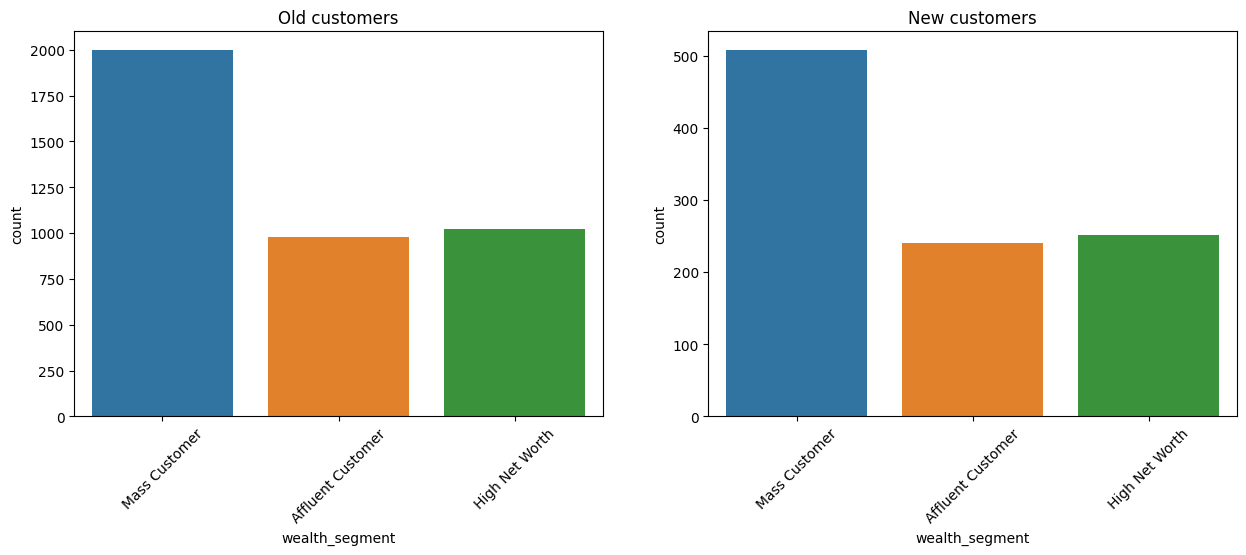

In [59]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
chart1 = sns.countplot(x='wealth_segment', data=df_customer_demographics)
chart1.set_xticklabels(chart1.get_xticklabels(), rotation=45)
chart1.set_title('Old customers')
plt.subplot(1,2,2)
chart2 = sns.countplot(x='wealth_segment', data=df_new_customers)
chart2.set_xticklabels(chart2.get_xticklabels(), rotation=45)
chart2.set_title('New customers')


Text(0.5, 1.0, 'New customers')

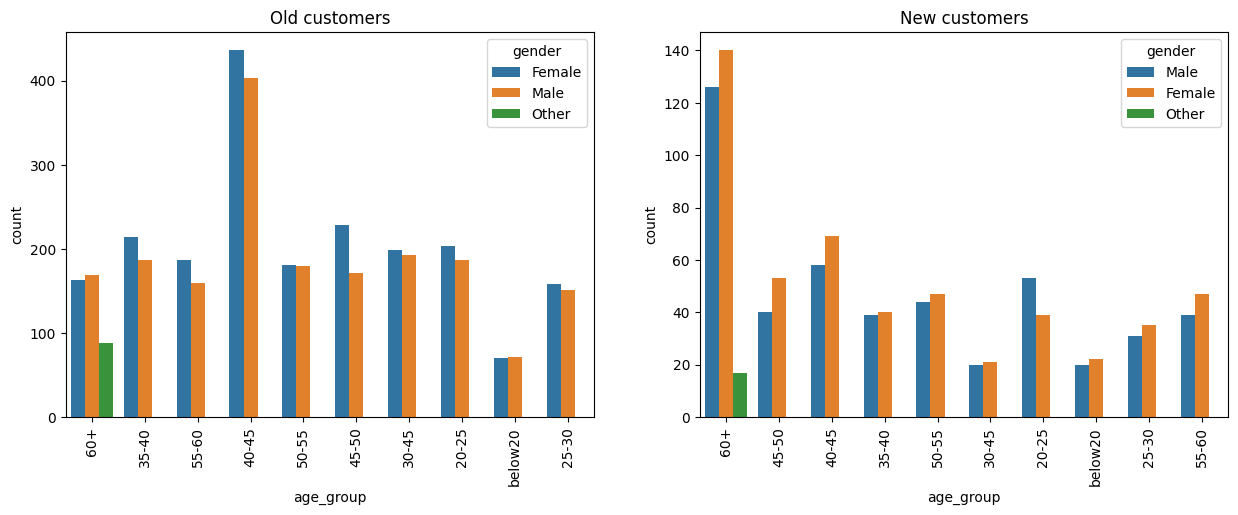

In [60]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
chart1 = sns.countplot(x='age_group', data=df_customer_demographics, hue='gender')
chart1.set_xticklabels(chart1.get_xticklabels(), rotation=90)
chart1.set_title('Old customers')
plt.subplot(1,2,2)
chart2 = sns.countplot(x='age_group', data=df_new_customers, hue='gender')
chart2.set_xticklabels(chart2.get_xticklabels(), rotation=90)
chart2.set_title('New customers')


Text(0.5, 1.0, 'New customers')

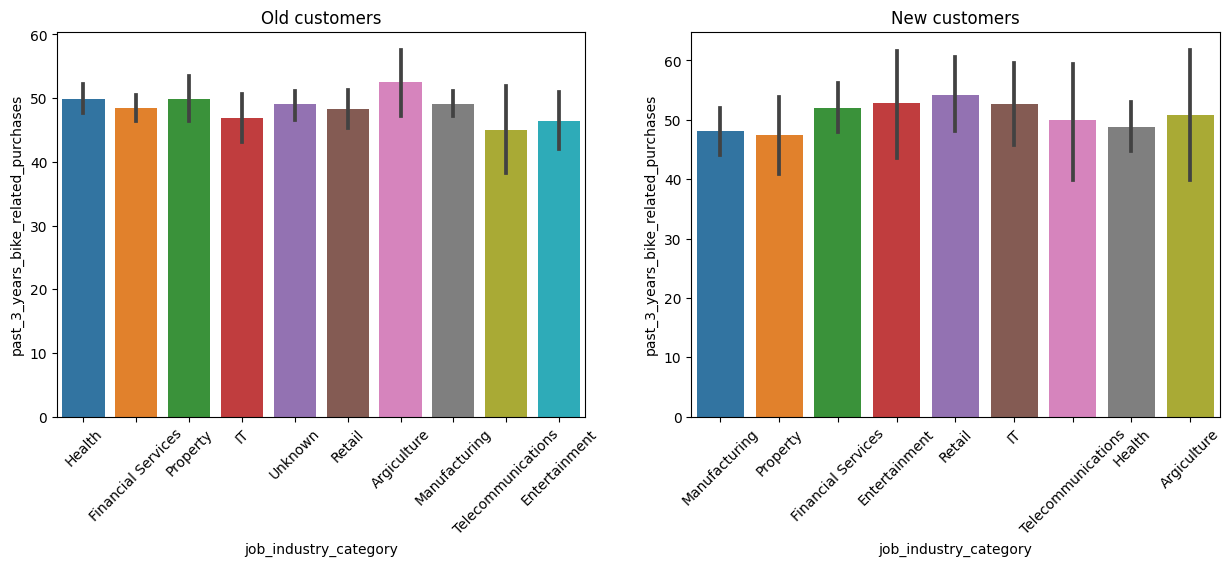

In [61]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
chart1 = sns.barplot(x='job_industry_category', y= 'past_3_years_bike_related_purchases', data=df_customer_demographics)
chart1.set_xticklabels(chart1.get_xticklabels(), rotation=45)
chart1.set_title('Old customers')
plt.subplot(1,2,2)
chart2 = sns.barplot(x='job_industry_category', y= 'past_3_years_bike_related_purchases', data=df_new_customers)
chart2.set_xticklabels(chart2.get_xticklabels(), rotation=45)
chart2.set_title('New customers')


<Figure size 2500x2500 with 0 Axes>

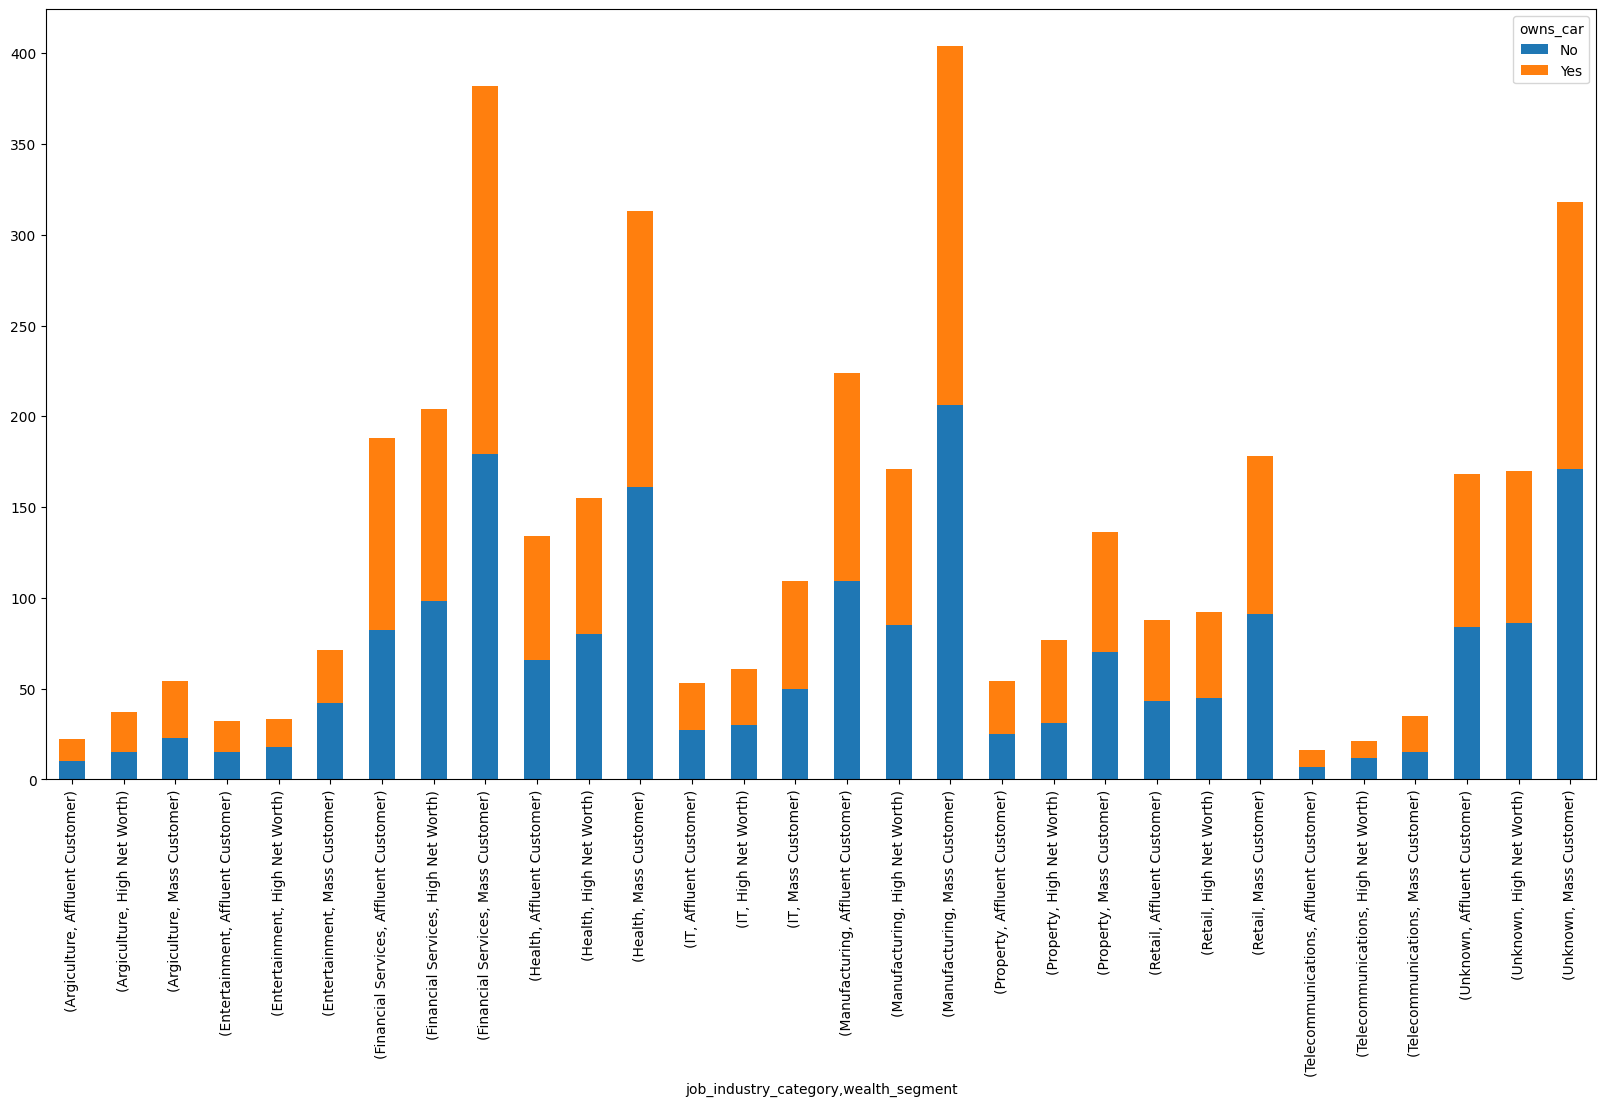

In [62]:
plt.figure(figsize=(25, 25))
new_grp = df_customer_demographics.groupby(by = [ 'job_industry_category', 'wealth_segment'])['owns_car'].value_counts().unstack().plot(kind='bar',figsize=(20,10), stacked=True)


In [63]:
df_customer_demographics = df_customer_demographics.join(df_customer_address['state'], on='customer_id')
df_customer_demographics.shape

(4000, 14)

<Figure size 1500x500 with 0 Axes>

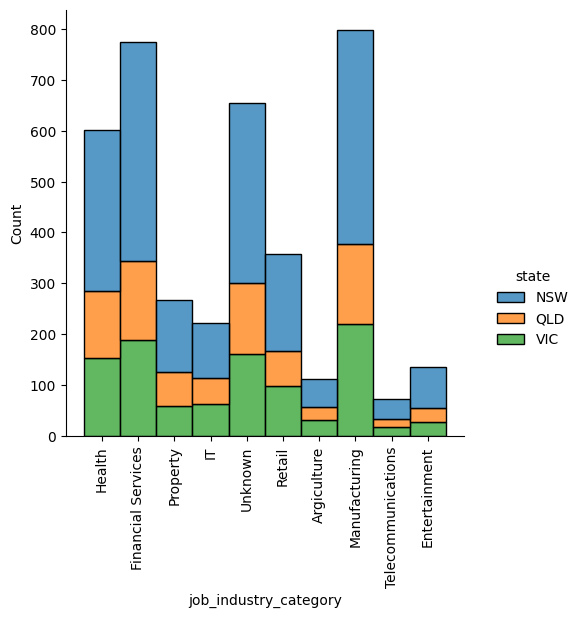

In [71]:
plt.figure(figsize=(15, 5))
chart3 = sns.displot(x='job_industry_category', data=df_customer_demographics, hue='state', multiple='stack')
chart3.set_xticklabels(rotation=90)


In [72]:
df_customer_demographics['job_industry_category'].value_counts()

job_industry_category
Manufacturing         799
Financial Services    774
Unknown               656
Health                602
Retail                358
Property              267
IT                    223
Entertainment         136
Argiculture           113
Telecommunications     72
Name: count, dtype: int64

<Axes: xlabel='state', ylabel='count'>

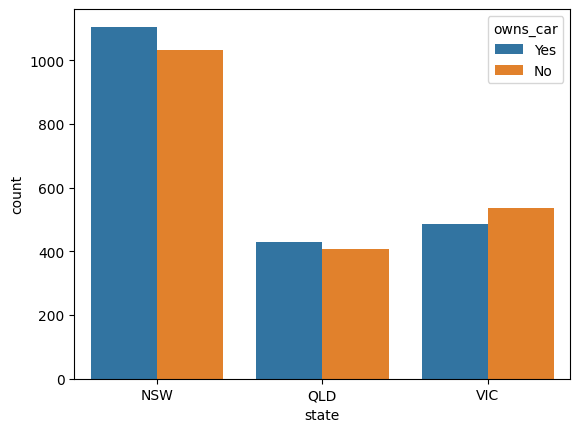

In [74]:
sns.countplot(x='state', data=df_customer_demographics, hue='owns_car')

In [78]:
df_customer_demographics.groupby(['job_industry_category','wealth_segment'])['past_3_years_bike_related_purchases']


In [87]:
#No of vehicles registered per 1000 people
df_vehicle_data = {
    'NSW':[543,108],
    'VIC':[604,109],
    'QLD':[571,164]               
}
df_vehicle_data = pd.DataFrame(df_vehicle_data).T
df_vehicle_data.columns=['passenger','lmv']
df_vehicle_data['total'] = df_vehicle_data['passenger'] + df_vehicle_data['lmv']
df_vehicle_data.head()

,passenger,lmv,total
NSW,543,108,651
VIC,604,109,713
QLD,571,164,735


,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,owns_car,tenure,age,age_group,state
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,Yes,11.0,65.0,60+,NSW
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,Yes,16.0,38.0,35-40,QLD
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,Yes,15.0,64.0,60+,NSW
3,4,Talbot,Unknown,Male,33,1961-10-03,Unknown,IT,Mass Customer,No,7.0,57.0,55-60,VIC
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,Unknown,Affluent Customer,Yes,8.0,41.0,40-45,NSW
